
# Lab 7 - K-Nearest Neighbours     Credit Card Defaulter Dataset

#### Author: Krishna Swaroop
#### 181CO125, NITK Surathkal

# Introduction

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

# Dataset

We are using the [credit card defaulters dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/) for this lab.

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)


# K-Nearest Neighbours

## 1) Import Libraries

In [1]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import numpy as np
from IPython.display import Image
import sys
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

## 2) Load the data

In [2]:
data_path = '/content/drive/MyDrive/Colab Notebooks/ML-Lab/KNN/UCI_Credit_Card.csv'

In [3]:
df = pd.read_csv(data_path)
print(df.head())

   ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2  ...       0.0       0.0                           1
1   2   120000.0    2  ...       0.0    2000.0                           1
2   3    90000.0    2  ...    1000.0    5000.0                           0
3   4    50000.0    2  ...    1069.0    1000.0                           0
4   5    50000.0    1  ...     689.0     679.0                           0

[5 rows x 25 columns]


In [4]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (30000, 25)


## 3) Split data

In [5]:
X = df.drop('default.payment.next.month',axis=1).values
y = df['default.payment.next.month'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y) 

## 4) Fit the model

Here, we loop through 1 to 20 neighbours to find out which gives us the highest test accuracy

In [6]:
neighbours = np.arange(1, 20)
train_accuracy = []
test_accuracy = []

for i, n_neighbours in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    
    #Fit the model
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    


Plot the accuracy values

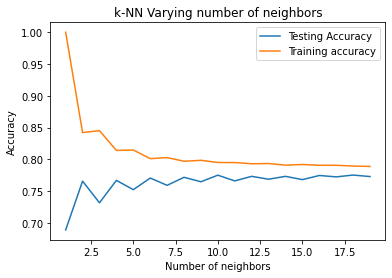

In [7]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

From the above plot, we see that the test accuracy reaches a maximum at `n_neighbours = 6/8`. We shall use n_neighbours = 8 for our calculation

In [8]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

print(f"Accuracy of the KNN model: {knn.score(X_test,y_test)}")

Accuracy of the KNN model: 0.7716666666666666


## 5) Performance Metrics and Analysis

### 5.1) Confusion Matrix 

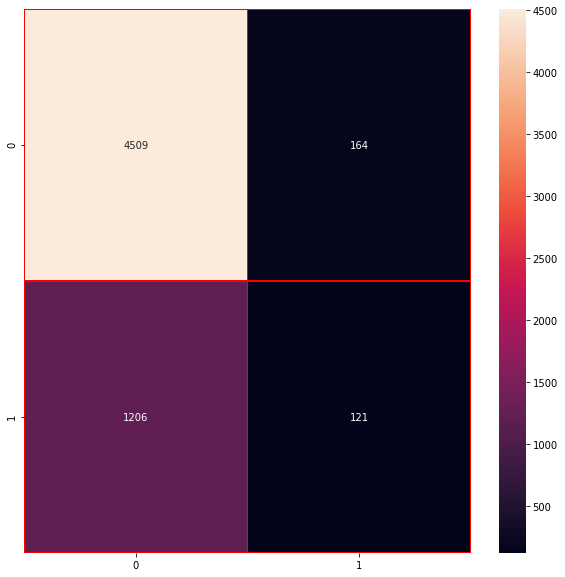

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()


In [10]:
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[4509  164]
 [1206  121]]
True Positives(TP) =  4509
True Negatives(TN) =  121
False Positives(FP) =  164
False Negatives(FN) =  1206


## 5.2) ROC Curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.


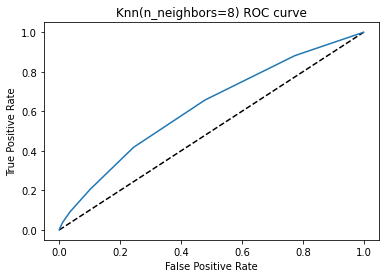

In [11]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [12]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6220040054371252